# UNZIP GIT FOLDER

In [ ]:
!unzip /content/multivariate-weather-data-clustering-main.zip

#Daily Dataset Pull

In [43]:
from google.colab import drive
import pandas as pd
import numpy as np
import xarray as xr
import netCDF4 as nc
import sys
drive.mount('/content/drive')
path7 = ('/content/drive/MyDrive/Multivariate Data Independent Study/ERA5_meteo_sfc_2021_daily.nc')
sst = xr.open_dataset(path7)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
from preprocessing import  null_fill
null_fill(input)

#Data Pre-processing 

With DBscan only SST variable were showing good results, the following function ssttransform() has only SST variable.
The function removes the null values by replacing it by a very high constant. Also it normalizes the data.

Importing ssttransform()

In [44]:
path_to_module = '/content/multivariate-weather-data-clustering-main/MWDC'
sys.path.append(path_to_module)
from preprocessing import  ssttransform

Using the function ssttransform() and storing value in sst1 variable.

In [45]:
sst1= ssttransform(sst)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = infer_fill_value(value)


#DBscan SST only

In [46]:
path_to_module = '/content/multivariate-weather-data-clustering-main/MWDC/clustering'
sys.path.append(path_to_module)
from dbscan import dbscanreal

The hyper-parameters have to be adjusted manually 

In [64]:
frame1,label1=dbscanreal(sst1,0.20,8)

Estimated number of clusters: 2
 0    192
 1    172
-1      1
Name: Cluster, dtype: int64
Estimated number of noise points: 1


In [48]:
ncpath='/content/drive/MyDrive/Multivariate Data Independent Study/New_ERA5_meteo_sfc_2021_daily.nc'

Removing noise (this can be later made a function also)

In [83]:
frame1.drop(frame1.index[(frame1["Cluster"] == -1)],axis=0,inplace=True)

In [84]:
len(frame1[frame1['Cluster']==-1])

0

In [89]:
label1 = label1[label1 != -1]

#RMSE for SST only

In [90]:
from evaluation import RMSE
RMSE(sst,label1,frame1,True)

,0,1
0,17.17,74.33
1,74.33,17.86


#Spatial_correlation for SST only

In [ ]:
from evaluation import Spat_Corr
Spat_Corr(sst,label1,frame1,True)

Taking a very long time to execute.

#Visualization

In [7]:
path_to_module = '/content/multivariate-weather-data-clustering-main/MWDC/Visualization'
sys.path.append(path_to_module)
from make_Csv_cluster import make_Csv_cluster

In [8]:
make_Csv_cluster(label1,'SST_only.csv')

In [10]:
path_to_module = '/content/multivariate-weather-data-clustering-main/MWDC/Visualization'
sys.path.append(path_to_module)
from Visualization import visualization

total clusters:  3
varid: sst
var_range: [286.9919318332959, 299.0668423730597]
0.0 0.0


/content/multivariate-weather-data-clustering-main/MWDC/Visualization/Visualization.py:54: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.subplot(panel)
/content/multivariate-weather-data-clustering-main/MWDC/Visualization/Visualization.py:71: UserWarning: The following kwargs were not used by contour: 'linewidth'
  p1=ax.contour(lon0,lat0,var,cmap=cmap0,levels=np.arange(var_range[0],var_range[1],(var_range[1]-var_range[0])/11),extend = 'both',linewidth=0.6)


varid: t2m
var_range: [-0.08280723076385484, -0.07839707801928061]
0.0 0.0
varid: u10
var_range: [-15.129702662479593, 16.82725476413482]
0.0 0.0
varid: v10
var_range: [-14.294945017569995, 14.039669939743764]
0.0 0.0
varid: sshf
var_range: [-43.41541985801895, 175.22246693947238]
0.0 0.0
varid: sp
var_range: [988.4012627283996, 1035.2741383402094]
0.0 0.0


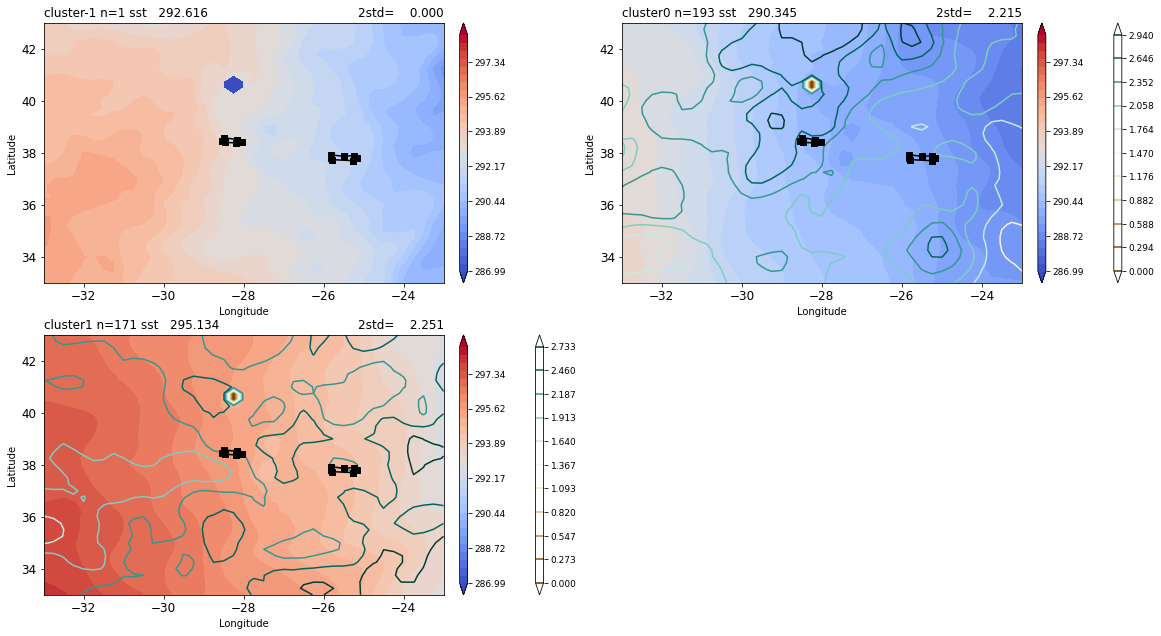

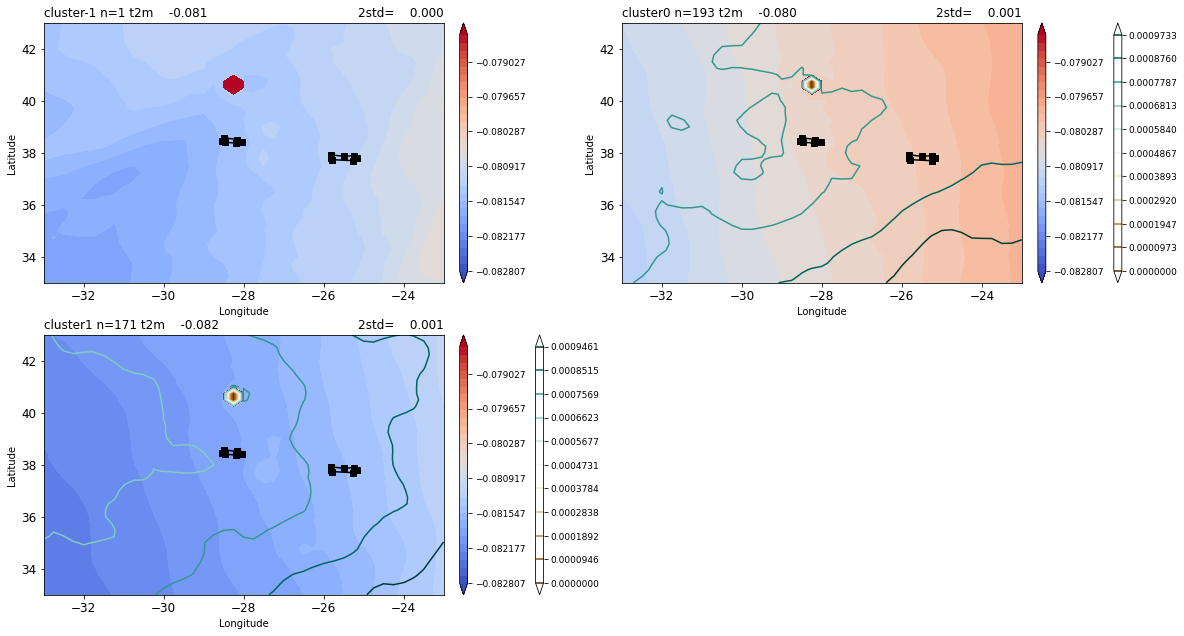

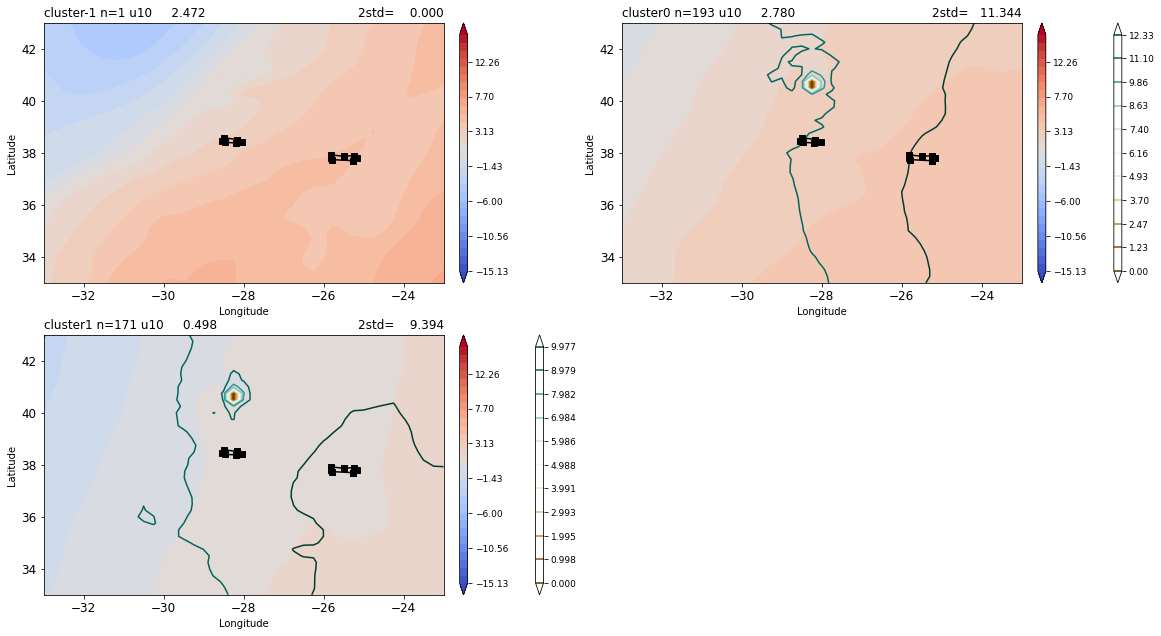

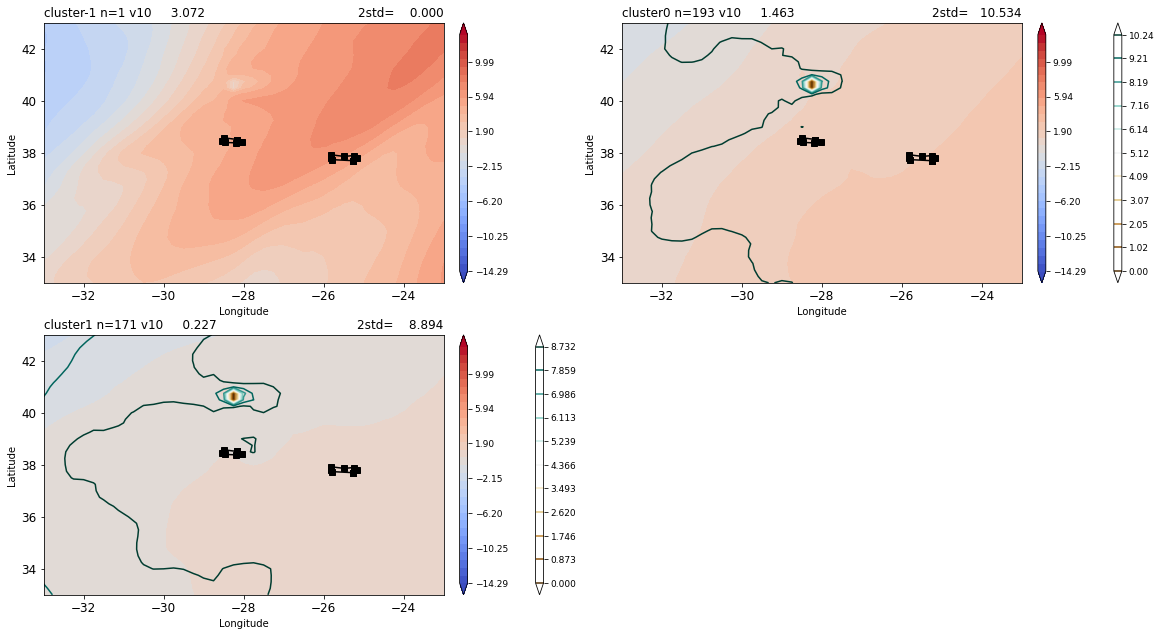

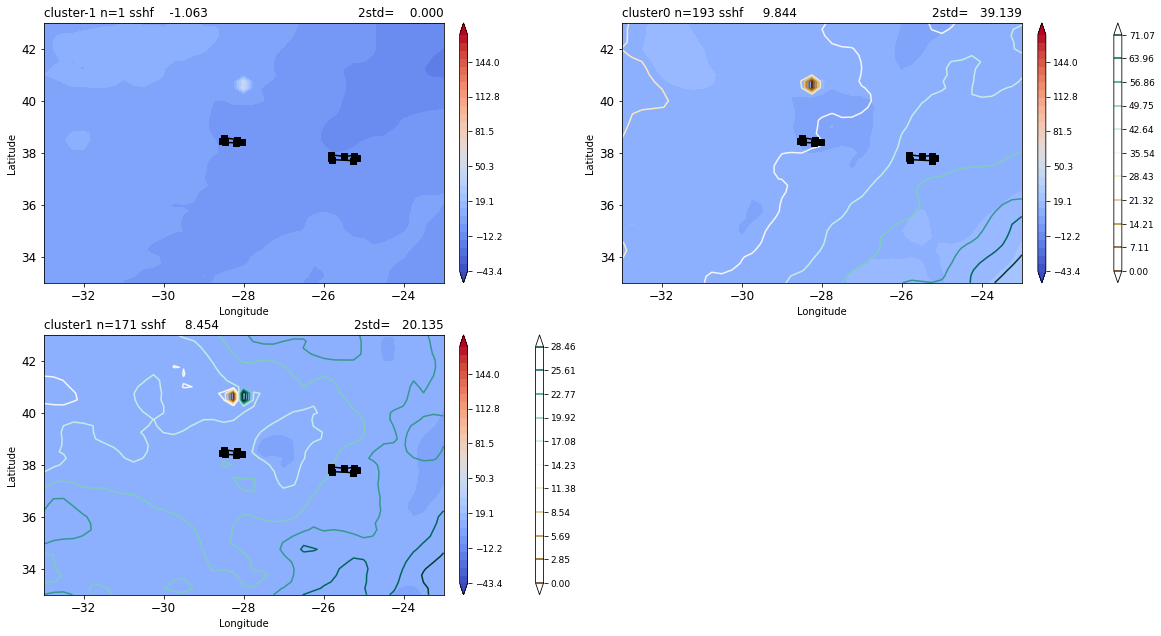

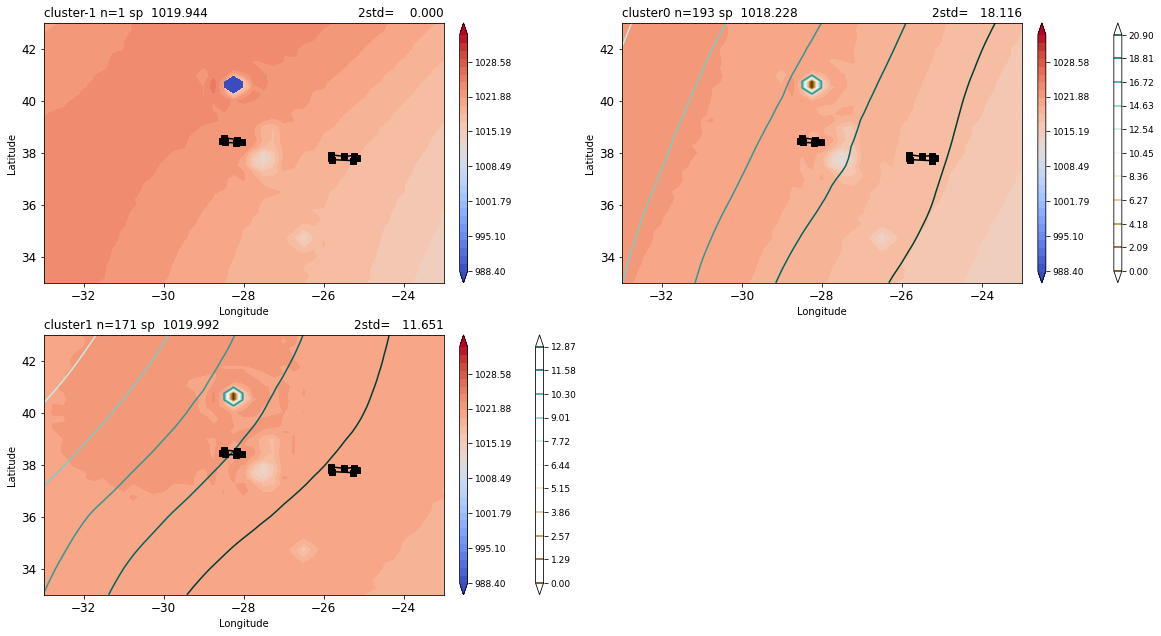

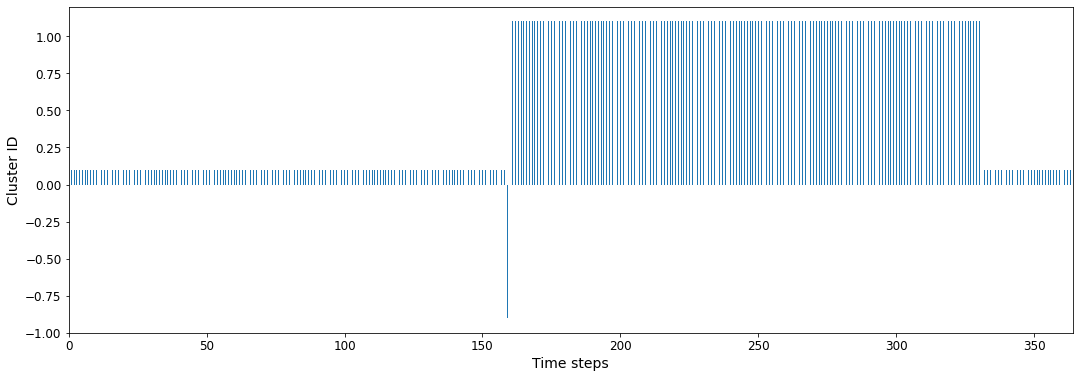

In [99]:
visualization('/content/drive/MyDrive/Multivariate Data Independent Study/New_ERA5_meteo_sfc_2021_daily.nc','SST_only.csv','/content/multivariate-weather-data-clustering-main/MWDC/Visualization/coast.txt')

#DBscan SST only With PCA

PCA compenent testing

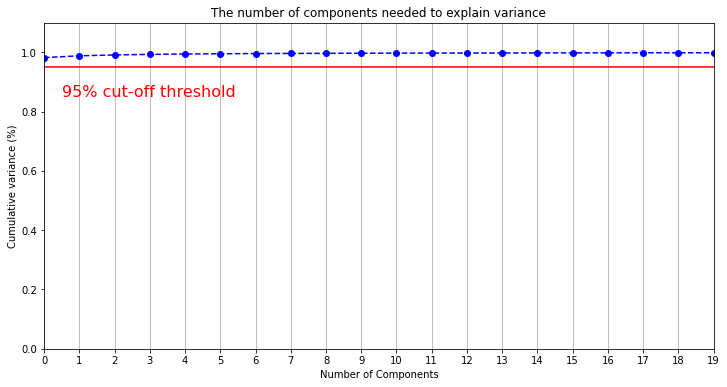

In [14]:
from preprocessing import pcacomponents
pcacomponents(sst1)

Any value above 95% cumulutive variance threshold can be considered for selecting components.

#Performing PCA

In [16]:
path_to_module = '/content/multivariate-weather-data-clustering-main/MWDC/'
sys.path.append(path_to_module)
from preprocessing import pca1

In [17]:
frame5,label5= dbscanreal(pca1(sst1,2),0.15,3)

Estimated number of clusters: 2
0    191
1    174
Name: Cluster, dtype: int64
Estimated number of noise points: 0


In [91]:
RMSE(sst1,label5,frame5,True)

,0,1
0,16.41,74.07
1,74.07,17.72


In [25]:
make_Csv_cluster(label5,'SST_PCA_only.csv')

In [26]:
ncpath='/content/drive/MyDrive/Multivariate Data Independent Study/New_ERA5_meteo_sfc_2021_daily.nc'
cluster_file='SST_PCA_only.csv'
coast_file='/content/multivariate-weather-data-clustering-main/MWDC/Visualization/coast.txt'

total clusters:  2
varid: sst
var_range: [286.9919318332959, 299.0668423730597]


/content/multivariate-weather-data-clustering-main/MWDC/Visualization/Visualization.py:54: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.subplot(panel)
/content/multivariate-weather-data-clustering-main/MWDC/Visualization/Visualization.py:71: UserWarning: The following kwargs were not used by contour: 'linewidth'
  p1=ax.contour(lon0,lat0,var,cmap=cmap0,levels=np.arange(var_range[0],var_range[1],(var_range[1]-var_range[0])/11),extend = 'both',linewidth=0.6)


varid: t2m
var_range: [-0.08280723076385484, -0.07839707801928061]
varid: u10
var_range: [-15.129702662479593, 16.82725476413482]
varid: v10
var_range: [-14.294945017569995, 14.039669939743764]
varid: sshf
var_range: [-43.41541985801895, 175.22246693947238]
varid: sp
var_range: [988.4012627283996, 1035.2741383402094]


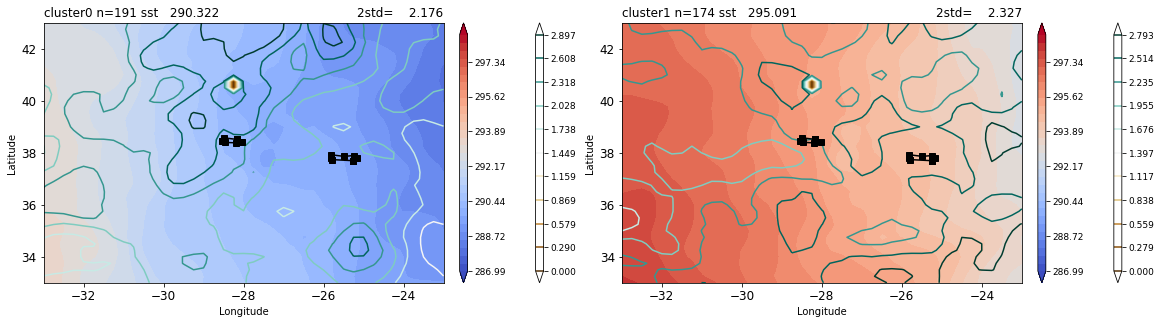

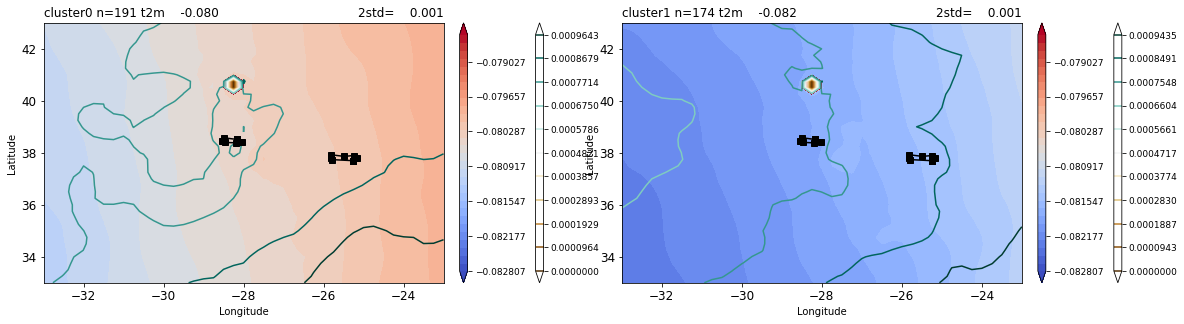

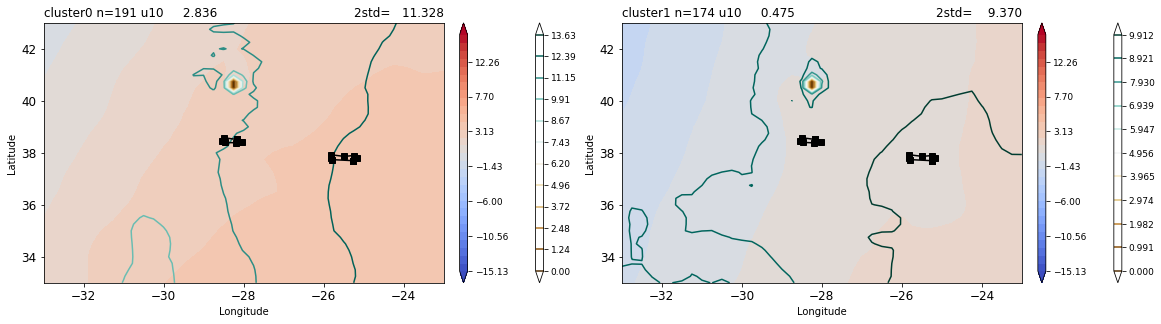

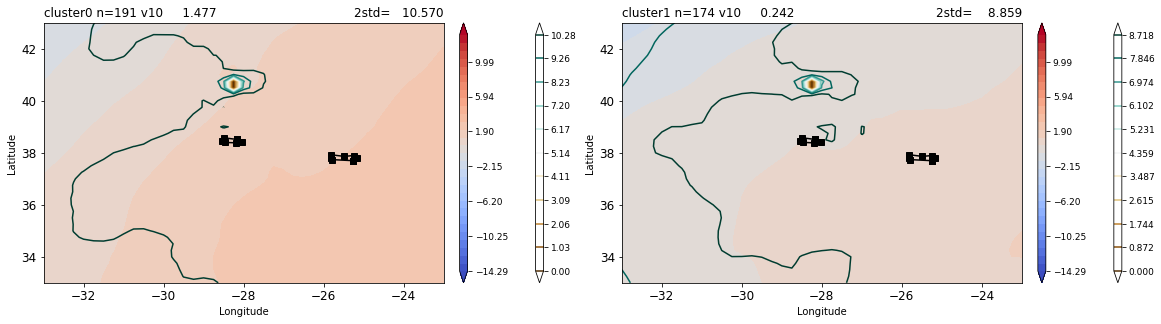

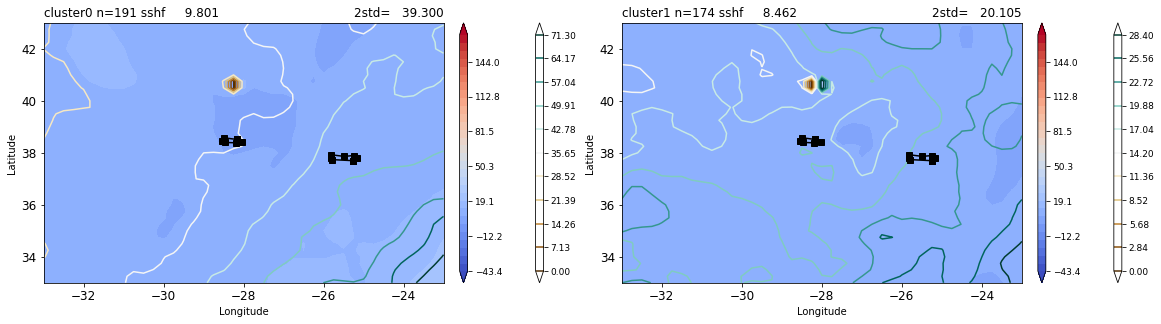

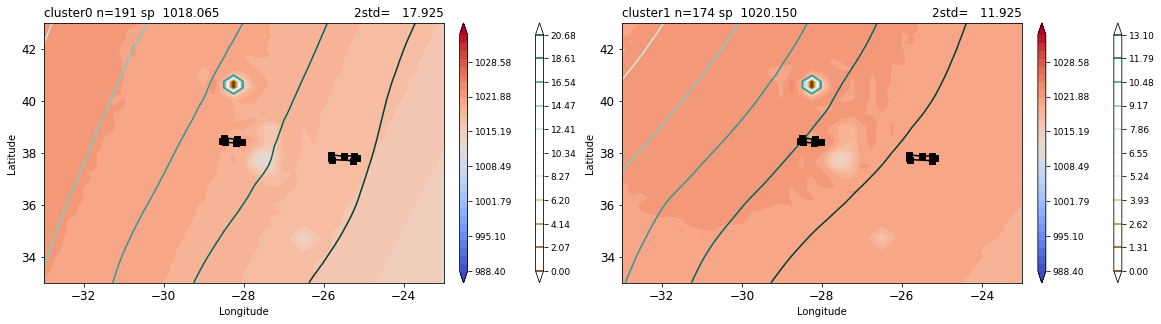

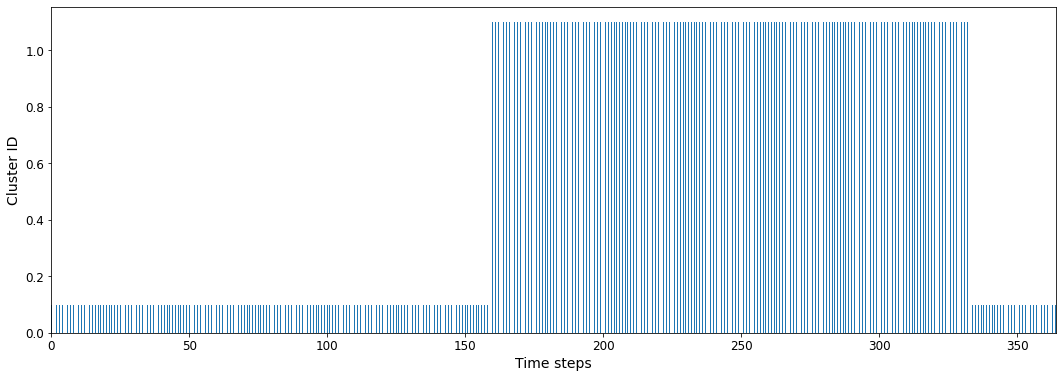

In [27]:
visualization(ncpath,cluster_file,coast_file)